In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 


In [3]:
#display(data)
def filter_data(data):
    
    max_flux = 12
    min_flux = 26
    data = data[data['flux_aper']>max_flux]
    data = data[data['flux_aper']<min_flux]
    data = data[data['flux_aper_lolim']<min_flux]
    data = data[data['flux_aper_hilim']>(max_flux-2)]
    data = data[data['significance']>2]
    data = data.sample(frac=1)
    display(data.describe())
    data_class = data[['class']]
    data_id = data['src_id']
    data_name = data['src_name']
    data_val = data.drop(columns=['index' , 'livetime' , 'gti_obs' , 'significance' , 'likelihood' , 'class' ,'src_id' ,'src_name'])
    data_sig = data[['significance']]
    #display(data_val)
    import missingno as msno
    msno.matrix(data_val)
    plt.show()

    data_val = data_val.replace(np.nan , 0)

    for d in data_val:
        mean = np.mean(data_val[d])
        var = np.var(data_val[d])
        data_val[d] = (data_val[d]-mean)/var
        data_val[d] = data_val[d] / np.amax(data_val[d])
    #msno.matrix(data_val)
    #plt.show()
    return data , data_val , data_class , data_id , data_sig 

,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,187.000000,187.000000,187.000000,187.000000,1.840000e+02,184.000000,184.000000,124.000000,124.000000,124.000000,...,42.000000,42.000000,41.000000,42.000000,42.000000,41.000000,42.000000,42.000000,42.000000,32.000000
mean,15.406417,56638.322460,138.532086,177369.569050,1.929311e-04,0.804813,5.992935,0.022869,0.020118,0.020519,...,12.282078,12.206637,3.596878,4.143929,937.983326,872.983494,0.864443,0.753812,731.305836,858.965312
std,20.049819,52192.311459,156.114263,223369.221377,2.308913e-04,0.163907,1.814635,0.049507,0.044346,0.044371,...,1.035976,0.957452,4.030895,12.283967,735.878947,693.015940,0.523943,0.341168,587.067770,470.088517
min,0.000000,4256.000000,1.840000,11.367330,1.352975e-07,0.302750,0.750000,0.000105,0.000057,0.000061,...,10.999566,10.982967,1.535000,1.160000,0.648700,0.083260,0.402400,0.360300,0.100100,10.730000
25%,2.000000,19531.900000,14.070000,1205.131000,6.238000e-07,0.807400,5.200000,0.000410,0.000236,0.000247,...,11.369536,11.351664,1.771000,1.531750,53.547500,54.170000,0.781550,0.641200,18.455000,420.700000
50%,6.000000,39623.000000,20.860000,2946.576000,9.064600e-06,0.830200,7.000000,0.000877,0.000568,0.000630,...,11.840239,11.802538,1.926000,1.715000,1540.500000,1428.000000,0.831000,0.775100,1203.000000,1133.000000
75%,23.500000,75554.300000,337.000000,462011.400000,4.811690e-04,0.847800,7.000000,0.008929,0.005938,0.007214,...,13.091326,13.039667,4.149000,2.595500,1561.750000,1474.000000,0.862050,0.815150,1227.750000,1156.000000
max,70.000000,184208.000000,337.000000,462011.400000,4.811690e-04,1.000000,8.000000,0.264078,0.230371,0.230462,...,14.354381,14.233364,24.980000,81.320000,1644.000000,1559.000000,3.964000,2.682000,1300.000000,1231.000000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,439.000000,439.000000,439.000000,4.390000e+02,3.630000e+02,363.000000,363.000000,237.000000,237.000000,237.000000,...,75.000000,75.000000,61.000000,75.000000,75.000000,72.000000,75.000000,75.000000,75.000000,47.000000
mean,20.505695,18948.935080,76.959453,inf,1.271236e-03,0.853966,6.285308,0.097291,0.082346,0.087225,...,11.856902,11.803172,7.261520,16.313637,278.151333,247.996639,2.011640,0.818695,171.546889,213.866449
std,23.409387,21329.349167,104.951353,inf,2.864180e-03,0.218744,2.210358,0.369036,0.357215,0.359814,...,0.967949,0.924399,13.126123,30.571815,381.302821,326.153092,9.526097,0.630970,268.396289,232.138831
min,0.000000,916.000000,1.740000,9.272045e+00,3.118000e-08,0.126000,0.000000,0.000151,0.000102,0.000103,...,9.764219,9.755723,0.357500,0.289700,10.860000,3.825000,0.200000,0.187800,0.007671,0.000000
25%,3.000000,4106.550000,6.250000,1.627296e+02,7.351000e-06,0.759600,5.200000,0.001404,0.000727,0.000843,...,11.075878,11.065001,0.739900,0.941800,30.355000,22.485000,0.400250,0.328500,0.960500,93.485000
50%,11.000000,9926.100000,49.260000,1.856473e+03,1.176452e-05,0.996750,7.666667,0.004324,0.002178,0.002887,...,11.788612,11.775208,1.306000,1.760000,178.100000,160.450000,0.576800,0.548500,103.300000,110.700000
75%,32.500000,28700.950000,107.710000,9.049175e+03,1.277774e-03,1.000000,8.000000,0.034415,0.010785,0.020842,...,12.369178,12.353578,7.178000,11.650000,218.900000,207.025000,1.134000,1.097500,138.400000,249.850000
max,94.000000,166689.200000,476.940000,1.797693e+308,2.225360e-02,1.000000,8.000000,4.011572,4.008746,4.009324,...,13.691649,13.522011,75.050000,99.720000,1712.000000,1195.000000,83.130000,2.837000,1211.000000,753.100000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,95.000000,95.000000,95.000000,95.000000,6.400000e+01,64.000000,64.000000,91.000000,91.000000,91.000000,...,40.000000,40.000000,32.000000,40.000000,40.000000,21.000000,40.000000,40.000000,40.000000,13.000000
mean,3.800000,38167.429474,34.787368,13917.093891,1.569417e-05,0.549704,3.207812,10.811307,0.008486,0.027849,...,12.745523,12.679084,172.910084,15.949073,65.215895,94.668162,1.084760,0.857302,18.581310,25.214215
std,6.295219,34566.563684,43.706247,22823.233977,2.432501e-05,0.237813,1.819018,103.045688,0.014996,0.183337,...,0.599896,0.555087,809.731605,25.729744,103.320202,91.493272,1.148652,0.680336,37.163859,28.506009
min,0.000000,3903.900000,1.840000,23.550950,3.031800e-07,0.099000,0.000000,0.000150,0.000068,0.000105,...,11.726999,11.693146,0.522700,0.409700,0.733300,0.296400,0.185600,0.163100,0.104400,0.242800
25%,0.000000,10162.000000,5.690000,390.680900,4.354550e-07,0.435812,2.062500,0.001266,0.000715,0.000823,...,12.286735,12.255141,5.523500,4.222000,2.864000,35.960000,0.588850,0.525050,0.361625,4.938000
50%,1.000000,24735.600000,12.860000,767.561600,1.856350e-06,0.594000,3.200000,0.003089,0.001824,0.002029,...,12.535139,12.505852,6.167500,5.092500,18.955000,71.940000,0.634600,0.582650,1.045500,11.790000
75%,4.000000,49106.450000,34.310000,7690.349500,1.984400e-05,0.782800,5.000000,0.012217,0.011797,0.012088,...,13.355166,13.203847,7.161000,6.587500,98.405000,145.400000,0.866600,0.817975,17.155000,40.620000
max,24.000000,166935.300000,144.290000,62909.280000,8.061540e-05,0.900000,6.200000,983.002387,0.073643,1.751740,...,13.901702,13.773916,4544.000000,93.450000,519.700000,379.300000,5.770000,3.038000,182.100000,87.780000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,429.000000,429.000000,429.000000,4.290000e+02,3.900000e+02,390.000000,390.000000,298.000000,298.000000,298.000000,...,58.000000,58.000000,54.000000,58.000000,58.000000,54.000000,58.000000,58.000000,58.000000,25.000000
mean,17.871795,35124.742657,74.404126,inf,4.442486e-04,0.838355,6.145299,0.013718,0.004888,0.006758,...,12.820128,12.720387,4.711957,4.472688,271.308271,223.398449,2.099698,0.580026,192.098201,313.553440
std,23.706241,41208.622564,113.543163,inf,1.825645e-03,0.202949,2.119913,0.069898,0.011805,0.015331,...,0.702803,0.629411,6.785657,11.426687,511.512865,436.480573,10.841690,0.409281,401.360490,437.335473
min,0.000000,1079.800000,2.110000,1.136733e+01,3.118000e-08,0.126000,0.000000,0.000105,0.000057,0.000061,...,11.788612,11.766243,0.357500,0.289700,0.648700,0.083260,0.200000,0.187800,0.077480,0.000000
25%,2.000000,4980.900000,13.830000,2.617542e+02,1.131475e-06,0.772250,4.800000,0.000639,0.000419,0.000449,...,12.250352,12.227122,0.724850,0.661550,18.250000,13.790000,0.291050,0.280525,0.502575,13.050000
50%,6.000000,25256.900000,23.470000,1.934920e+03,7.351000e-06,0.840000,7.000000,0.002087,0.001162,0.001259,...,12.902696,12.795819,2.606500,1.894000,39.205000,25.930000,0.595150,0.527600,9.860500,68.050000
75%,26.000000,39869.400000,49.260000,9.049175e+03,5.690000e-05,1.000000,8.000000,0.006286,0.003709,0.004900,...,13.257238,13.128696,5.073500,3.447500,133.575000,110.675000,0.822750,0.724125,78.990000,425.600000
max,94.000000,184208.000000,476.940000,1.797693e+308,2.225360e-02,1.000000,8.000000,1.128588,0.091976,0.092224,...,14.354381,14.233364,35.720000,81.320000,1712.000000,1485.000000,83.130000,2.682000,1299.000000,1169.000000


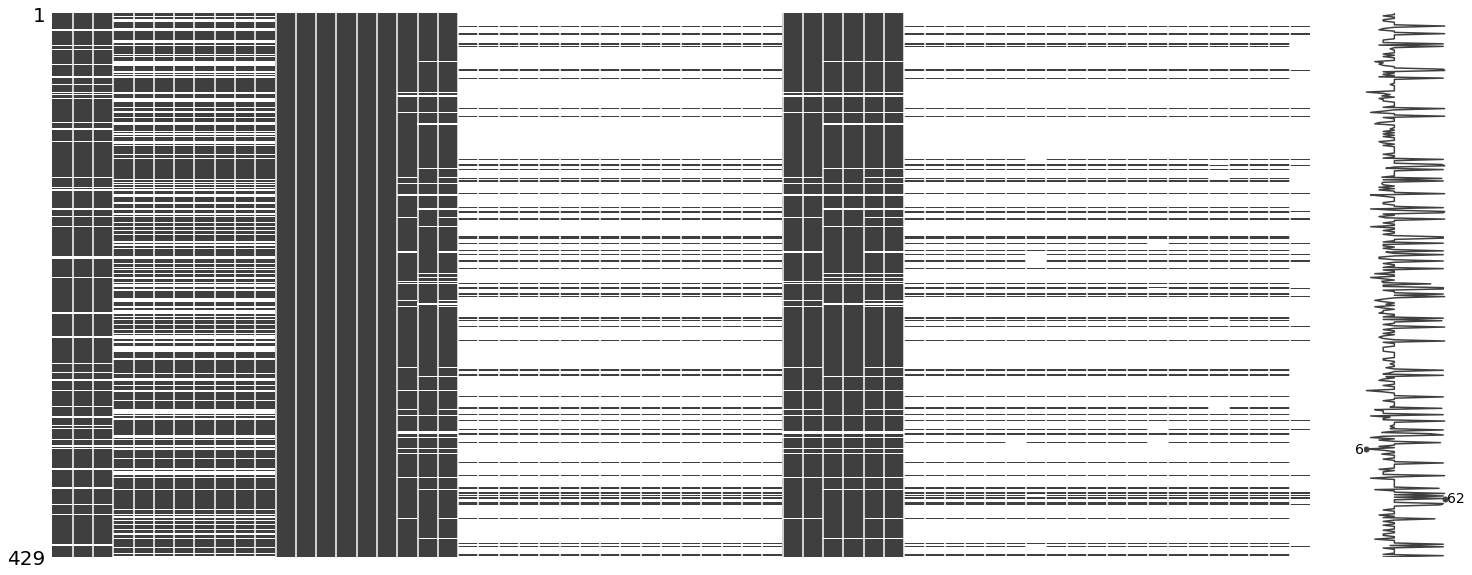

In [4]:
train_bh = pd.read_csv('processed_data/BH_train.csv')
train_bh = train_bh.sample(frac=1)
#display(data_bh)
display(train_bh.describe())
train_ns = pd.read_csv('processed_data/NS_train.csv')
train_ns = train_ns.sample(frac=1)
#display(data_ns)
display(train_ns.describe())


train_pulsar = pd.read_csv('processed_data/PULSAR.csv')
display(train_pulsar.describe())
train_cv = pd.read_csv('processed_data/CV.csv')
train_cv.describe()
train_cv= train_cv.sample(frac=1)
train = pd.concat([train_bh , train_ns ] , axis=0)
train =  train.sample(frac=1)

train_data ,  data_val , data_class , data_id , data_sig = filter_data(train)

In [5]:
train_data[['flux_aper_hilim' , 'flux_aper_lolim' ,'flux_aper']].describe()

,flux_aper_hilim,flux_aper_lolim,flux_aper
count,429.000000,429.000000,429.000000
mean,13.938842,14.529664,14.208409
std,0.765291,1.066878,0.866879
min,11.886136,12.022661,12.009448
25%,13.412457,13.833623,13.644510
50%,13.926766,14.496264,14.205419
75%,14.452266,15.218087,14.792898
max,16.031949,17.980053,16.724746


In [6]:
data_bh_clean = train_data[data_class['class']=='BH']
display(data_bh_clean.describe())
data_ns_clean = train_data[data_class['class']=='NS']
display(data_ns_clean.describe())

,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,143.000000,143.000000,143.000000,143.000000,1.400000e+02,140.000000,140.000000,104.000000,104.000000,104.000000,...,23.000000,23.000000,22.000000,23.000000,23.000000,22.000000,23.000000,23.000000,23.000000,13.000000
mean,10.965035,63258.737063,120.920839,150771.098237,1.657720e-04,0.798231,5.848214,0.006807,0.003697,0.004122,...,13.022456,12.901355,4.789545,5.934826,486.743900,420.173330,0.874113,0.703974,372.544570,526.283077
std,16.042818,54761.498579,149.732203,215154.902409,2.229947e-04,0.166893,1.865682,0.027374,0.009799,0.010273,...,0.834778,0.747228,5.023606,16.498717,662.499025,598.935013,0.714456,0.458640,529.700495,515.796614
min,0.000000,4256.000000,2.110000,11.367330,1.352975e-07,0.302750,0.750000,0.000105,0.000057,0.000061,...,11.820448,11.766243,1.535000,1.160000,0.648700,0.083260,0.402400,0.360300,0.100100,10.730000
25%,1.000000,24613.300000,16.290000,1238.383000,4.139120e-07,0.807400,5.200000,0.000360,0.000218,0.000232,...,12.393869,12.350820,2.085500,1.465500,10.985500,5.455750,0.532100,0.475450,0.947600,21.800000
50%,4.000000,40580.400000,17.390000,1457.845000,1.996660e-06,0.830200,7.000000,0.000598,0.000346,0.000376,...,13.083178,13.013990,3.393500,2.021000,76.580000,57.050000,0.790100,0.670600,32.890000,406.000000
75%,10.000000,75682.200000,337.000000,462011.400000,4.811690e-04,0.847800,7.000000,0.003266,0.002250,0.002314,...,13.403267,13.295136,4.834750,3.117000,941.650000,595.175000,0.831500,0.739050,749.100000,1108.000000
max,70.000000,184208.000000,337.000000,462011.400000,4.811690e-04,1.000000,8.000000,0.264078,0.057274,0.057421,...,14.354381,14.233364,24.980000,81.320000,1627.000000,1485.000000,3.964000,2.682000,1299.000000,1169.000000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,286.000000,286.000000,286.000000,2.860000e+02,2.500000e+02,250.000000,250.000000,194.000000,194.000000,194.000000,...,35.000000,35.000000,32.000000,35.000000,35.000000,32.000000,35.000000,35.000000,35.000000,12.000000
mean,21.325175,21057.745455,51.145769,inf,6.001955e-04,0.860825,6.311667,0.017422,0.005527,0.008172,...,12.687169,12.601466,4.658616,3.511854,129.736286,88.115719,2.905083,0.498574,73.519159,83.096333
std,26.073497,21455.328402,81.003773,inf,2.260789e-03,0.217682,2.236135,0.084137,0.012730,0.017310,...,0.575557,0.515898,7.849799,6.353303,320.335288,190.638242,13.965743,0.357065,228.053863,125.087389
min,0.000000,1079.800000,2.320000,1.257282e+01,3.118000e-08,0.126000,0.000000,0.000151,0.000102,0.000103,...,11.788612,11.775208,0.357500,0.289700,11.910000,6.983000,0.200000,0.187800,0.077480,0.000000
25%,2.000000,4114.325000,6.822500,1.627296e+02,7.351000e-06,0.772250,4.500000,0.001154,0.000632,0.000719,...,12.243598,12.218049,0.606550,0.552850,19.255000,16.015000,0.277200,0.266500,0.484000,12.060000
50%,8.000000,13874.200000,23.470000,1.934920e+03,7.351000e-06,0.999600,7.800000,0.002846,0.001524,0.001699,...,12.474178,12.444906,0.926950,0.776400,34.860000,22.470000,0.354100,0.288500,7.737000,50.050000
75%,35.000000,30425.450000,49.260000,9.049175e+03,1.736400e-05,1.000000,8.000000,0.007689,0.004341,0.006048,...,13.233671,13.082826,5.369250,3.682000,93.265000,43.247500,0.731100,0.704950,28.585000,96.367500
max,94.000000,158025.600000,476.940000,1.797693e+308,2.225360e-02,1.000000,8.000000,1.128588,0.091976,0.092224,...,13.691649,13.522011,35.720000,32.540000,1712.000000,800.600000,83.130000,1.651000,1211.000000,455.500000


In [7]:
def split_data(x,y,s,id,frac):
    split_no = int(len(y)*frac )
    x_train = x[:split_no]
    x_test = x[split_no:]
    y_train = y[:split_no]
    y_test = y[split_no:]
    s_train = s[:split_no]
    s_test = s[split_no:]
    id_train = id[:split_no]
    id_test = id[split_no:]
    return (x_train , y_train , s_train , id_train ) , (x_test , y_test , s_test , id_test)

x = data_val.to_numpy()
y = data_class.to_numpy()
s = data_sig.to_numpy()
s = s/np.amax(s)
#s = [float(si) for si in s]
(x_train , y_train , s_train , id_train) , (x_test , y_test , s_test , id_test) =  split_data(x, y,s, data_id , 1)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(429, 62) (429, 1)
(0, 62) (0, 1)


# Neural Network

In [8]:
def class_to_int(label , cl):
    temp = []
    for i in range(len(label)):
        #print(label[i])
        for j in range(len(cl)):
            if(label[i]==cl[j]):
                temp.append(j) 
    return temp
classes = ['BH' ,'NS' ]
y_train_int = class_to_int(y_train, classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_y_train =  to_categorical(y_train_int)
#one_hot_y_test =  to_categorical(y_test_int)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)

In [9]:
desc_class = pd.DataFrame()
y_class_ser = (np.asarray(y_train).reshape(len(y_train)))
desc_class.insert(0, 'cl', y_class_ser)
ns_n = desc_class.value_counts()['NS']
bh_n= desc_class.value_counts()['BH']
print(ns_n , bh_n)

286 143


In [10]:

def model_gen(shape , input_len):

    inputs =  keras.Input(shape=(input_len,))
    dense =  layers.Dense(32, activation='relu')
    x = dense(inputs)
    #x =  layers.BatchNormalization(axis=-1)(x)
    
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    #x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    x = layers.Dense(16, activation='relu')(x)
    #x = layers.Dense(4, activation='relu')(x)
    #x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(2 , activation='softmax')(x)
    model = keras.Model(inputs=inputs , outputs=outputs , name='trial_model')
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.0005),
        metrics = ["accuracy"],
    )
    return model
model = model_gen([32,32,16,8] , x_train.shape[1])
class_weight = {0: (ns_n/(ns_n+bh_n)),
                1: (bh_n/(ns_n+bh_n))}
history = model.fit(x_train, one_hot_y_train, batch_size=32, epochs=70, validation_split=0.2 , class_weight=class_weight , sample_weight=s_train)


2021-09-27 10:32:01.705878: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-27 10:32:01.706096: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-27 10:32:01.706442: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-09-27 10:32:01.886577: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-27 10:32:01.905504: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


Epoch 1/70
11/11 [==============================] - 2s 123ms/step - loss: 0.0488 - accuracy: 0.4588 - val_loss: 0.0994 - val_accuracy: 0.3256
Epoch 2/70
11/11 [==============================] - 1s 54ms/step - loss: 0.0448 - accuracy: 0.3627 - val_loss: 0.0961 - val_accuracy: 0.3372
Epoch 3/70
11/11 [==============================] - 0s 36ms/step - loss: 0.0461 - accuracy: 0.4379 - val_loss: 0.0928 - val_accuracy: 0.3721
Epoch 4/70
11/11 [==============================] - 0s 24ms/step - loss: 0.0392 - accuracy: 0.4518 - val_loss: 0.0887 - val_accuracy: 0.4535
Epoch 5/70
11/11 [==============================] - 0s 42ms/step - loss: 0.0387 - accuracy: 0.5104 - val_loss: 0.0844 - val_accuracy: 0.4767
Epoch 6/70
11/11 [==============================] - 0s 28ms/step - loss: 0.0373 - accuracy: 0.5426 - val_loss: 0.0800 - val_accuracy: 0.5116
Epoch 7/70
11/11 [==============================] - 0s 36ms/step - loss: 0.0335 - accuracy: 0.5429 - val_loss: 0.0730 - val_accuracy: 0.5581
Epoch 8/70
1

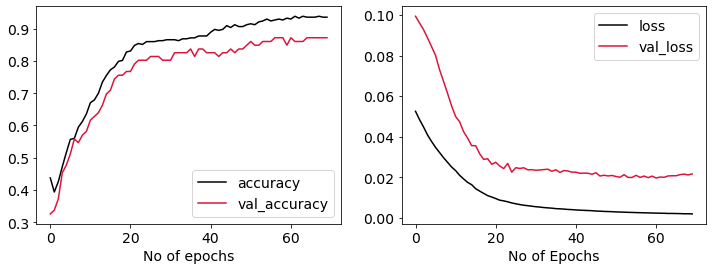

In [23]:
hist = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'] , label = 'accuracy' , color='k')
plt.plot(hist['val_accuracy'] , label = 'val_accuracy' , color='crimson')
plt.xlabel('No of epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'] , label = 'loss' , color='k')
plt.plot(hist['val_loss'] , label='val_loss' , color='crimson')
plt.xlabel("No of Epochs")
plt.legend()
#plt.savefig('plots/NS_BH.png')
plt.show()

In [12]:
model.save('models/NN_NS_BH.mdl')
#np.save('test_data/NN_NS_BH.cv' , x_test)
#np.save('test_data/NN_NS_BH_label.cv' , one_hot_y_test)

2021-09-27 10:32:40.092568: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/NN_NS_BH.mdl/assets


In [13]:
import seaborn as sns

In [14]:
%reload_ext autoreload

In [15]:
%autoreload 2
#from my_utils.score import test_func , conf_matrix
from my_utils.print_lines import *



In [16]:
font = {'size'   : 14}
plt.rc('font', **font)

In [17]:
def conf_matrix(model ,x, oh_yt , plot=0):
    '''
    return confusion matrix
    Parameters :
        model -  Keras model
        x - test/training data
        oh_yt =  one hot encoded test labels
    '''
    y_pred_prob = model.predict(x)
    #y_pred=  [np.argmax(yi) for yi in y_pred]
    y_pred = []
    for yi in y_pred_prob:
        temp = [0]*len(yi)
        temp[np.argmax(yi)] = 1
        y_pred.append(temp)
    y_pred =  np.asarray(y_pred)
    #print(y)
    cf = np.matmul(oh_yt.T , y_pred)
    return cf

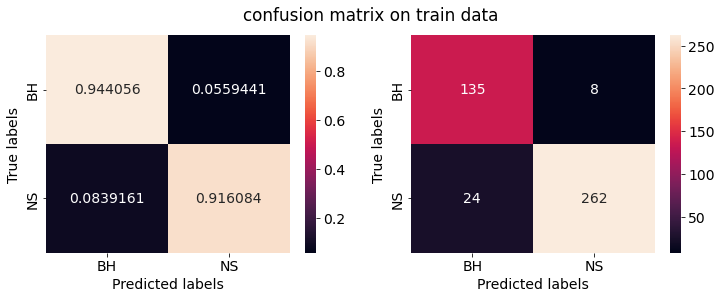

In [18]:
cf = conf_matrix(model , x_train, one_hot_y_train)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels'); 
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']); 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on train data')
#plt.savefig('plots/cf_ns_bh_test.jpg')
plt.show()
plt.close()

## TEST

,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,23.000000,23.000000,23.000000,23.000000,2.300000e+01,23.000000,23.000000,22.000000,22.000000,22.000000,...,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.478261,60786.926087,61.184783,48204.489483,1.216120e-03,0.815600,5.130435,0.630896,0.357289,0.483885,...,11.398043,11.368104,85.380200,18.076833,892.201667,816.411667,1.365700,1.231717,669.438333,597.485000
std,3.043168,58240.932562,71.935513,70257.923899,1.856081e-03,0.176134,2.096411,1.238236,0.898407,1.002995,...,0.698471,0.695889,118.874308,21.814217,646.484397,590.557619,0.623297,0.527771,505.033780,453.899642
min,0.000000,5023.000000,11.120000,458.205300,5.171680e-07,0.636200,3.000000,0.000125,0.000084,0.000085,...,10.713993,10.694434,1.686000,1.523000,58.350000,51.510000,0.764800,0.722200,20.540000,15.220000
25%,1.000000,11611.100000,11.120000,458.205300,5.171680e-07,0.636200,3.000000,0.000226,0.000127,0.000135,...,11.028293,11.001070,4.195000,4.050000,350.645000,329.970000,0.794100,0.751175,237.467500,210.217500
50%,3.000000,45771.400000,12.970000,978.006600,1.663360e-06,0.943000,6.600000,0.001116,0.000738,0.000763,...,11.093969,11.059913,8.420000,11.083500,1247.500000,1163.500000,1.368450,1.219900,926.250000,821.900000
75%,5.500000,75618.250000,166.940000,151803.000000,3.960122e-03,0.992800,7.200000,0.640667,0.094527,0.413460,...,11.699518,11.662117,144.000000,20.355000,1311.750000,1210.250000,1.882500,1.664250,1036.850000,904.825000
max,10.000000,184208.000000,166.940000,151803.000000,3.960122e-03,0.992800,7.400000,4.403000,3.219000,3.219000,...,12.578561,12.550059,268.600000,59.620000,1415.000000,1242.000000,2.036000,1.821000,1062.000000,987.100000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,42.000000,42.000000,42.000000,4.200000e+01,4.100000e+01,41.000000,41.000000,41.000000,41.000000,41.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4.500000,38231.426190,25.885000,inf,1.728124e-04,0.839694,5.770732,0.030664,0.028111,0.029175,...,12.359818,12.299505,1.567625,1.226115,52.674000,43.699500,0.414700,0.373920,29.275000,20.188850
std,4.446155,50069.451449,16.730627,inf,1.756895e-04,0.173153,2.249138,0.042068,0.041250,0.041503,...,0.523181,0.488516,1.799679,1.283594,14.270515,10.143119,0.150304,0.148075,13.325276,8.715549
min,0.000000,977.000000,2.700000,3.214374e+01,5.373150e-08,0.449000,2.000000,0.000125,0.000084,0.000085,...,11.472370,11.449283,0.538500,0.372100,35.840000,27.420000,0.286400,0.225700,11.120000,2.627000
25%,1.000000,6535.350000,11.120000,4.582053e+02,5.171680e-07,0.636200,3.000000,0.000999,0.000622,0.000660,...,12.151835,12.112071,0.783825,0.654100,44.440000,37.345000,0.332725,0.298075,23.185000,15.475000
50%,3.000000,12441.700000,28.020000,1.905399e+04,1.196100e-04,0.943000,6.600000,0.004657,0.002703,0.003395,...,12.291312,12.235569,1.015200,0.778550,50.455000,41.710000,0.359350,0.322350,26.880000,20.470000
75%,7.750000,48406.200000,44.360000,3.718484e+04,2.949040e-04,1.000000,8.000000,0.048293,0.046373,0.048055,...,12.494678,12.431157,1.211750,1.016525,54.687500,46.107500,0.409575,0.365975,30.287500,22.385000
max,15.000000,184208.000000,44.360000,1.797693e+308,5.079373e-04,1.000000,8.000000,0.203908,0.203490,0.203719,...,13.772628,13.634887,8.420000,5.877000,102.000000,74.910000,0.864900,0.807800,75.670000,48.250000


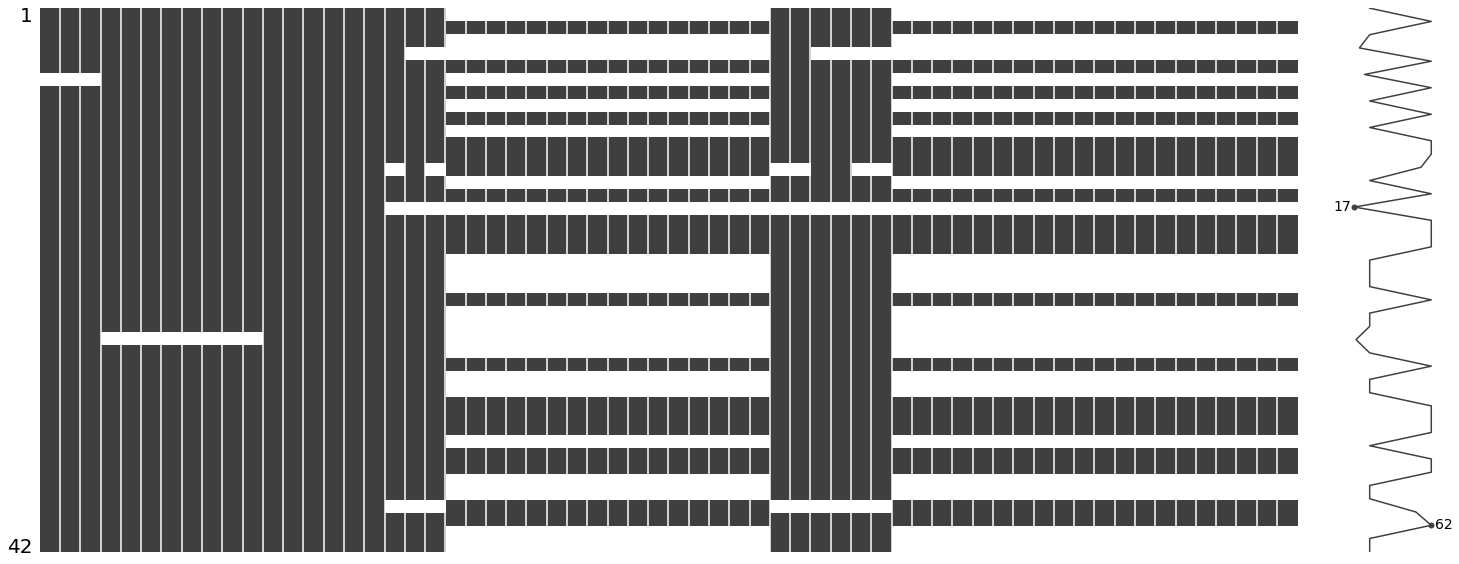

,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,var_sigma,kp_prob,ks_prob,var_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,...,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01
mean,-4.150119e-16,-9.516197e-16,-2.114711e-16,1.982541e-18,4.625929e-17,6.013708e-17,-5.782412e-18,-4.229421e-17,5.782412e-17,-1.063964e-16,...,3.700743e-17,5.286776e-18,9.912706e-18,1.652118e-17,-5.286776e-18,8.194503e-17,-3.436405e-17,-1.586033e-17,5.286776e-18,3.568574e-17
std,5.175415e-01,1.190055e+00,1.011275e+00,2.403813e-01,2.327429e-01,2.353357e-01,1.811244e-01,5.236642e-01,5.484134e-01,3.744984e-01,...,7.934408e-01,8.004810e-01,1.901420e-01,2.023922e-01,3.684856e-01,4.277865e-01,3.494987e-01,3.401559e-01,2.811803e-01,3.055303e-01
min,-4.972823e-01,-4.546348e+00,-2.380282e+00,-1.720569e-01,-1.558765e-01,-1.625261e-01,-5.840315e-02,-1.051780e+00,-1.072803e+00,-6.318229e-01,...,-7.462442e-01,-7.530114e-01,-9.728115e-02,-1.103059e-01,-3.261023e-01,-3.846398e-01,-2.958783e-01,-2.827458e-01,-2.258316e-01,-2.488268e-01
25%,-4.957578e-01,-1.017762e+00,-1.112676e+00,-1.680773e-01,-1.539527e-01,-1.602908e-01,-5.619688e-02,-3.438363e-01,-4.263914e-01,-3.654716e-01,...,-7.462442e-01,-7.530114e-01,-9.728115e-02,-1.103059e-01,-3.261023e-01,-3.846398e-01,-2.958783e-01,-2.827458e-01,-2.258316e-01,-2.488268e-01
50%,-1.446995e-01,4.509115e-01,2.816901e-01,-1.485184e-01,-1.417762e-01,-1.443391e-01,-4.868153e-02,-1.000893e-02,-2.763393e-02,-3.952622e-02,...,-7.462442e-01,-7.530114e-01,-9.728115e-02,-1.103059e-01,-3.261023e-01,-3.846398e-01,-2.958783e-01,-2.827458e-01,-2.258316e-01,-2.488268e-01
75%,3.720268e-01,1.000000e+00,1.000000e+00,1.039432e-01,1.037767e-01,1.095657e-01,-3.391350e-02,3.960127e-01,4.866701e-01,2.485350e-01,...,8.041889e-01,8.122174e-01,2.677873e-02,3.088164e-02,3.092242e-01,3.598975e-01,2.262413e-01,2.195624e-01,2.016381e-01,2.571745e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


(42, 2)


In [19]:
test_bh = pd.read_csv('processed_data/BH_test.csv')
display(test_bh.describe())
test_ns = pd.read_csv('processed_data/NS_test.csv')
test_pulsar = pd.read_csv('processed_data/PULSAR.csv')
test_cv = pd.read_csv('processed_data/CV.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test = test.sample(frac=1)
test_data , t_val , t_class , t_id , t_sig = filter_data(test)


t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)

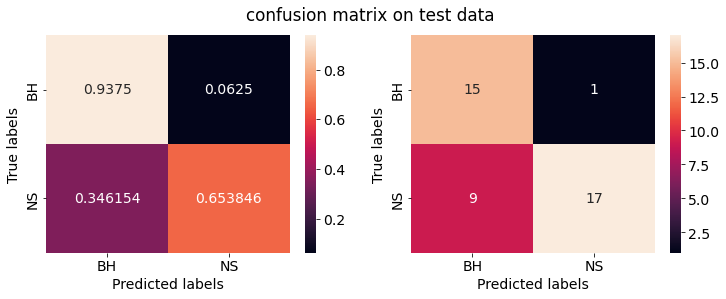

In [20]:
cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on test data')
#plt.savefig('plots/cf_ns_bh_test.jpg')
plt.show()
plt.close()

In [21]:
y_test_pred_prob =  model.predict(x_test)
y_test_pred = []
for yi in y_test_pred_prob:
    temp = [0]*len(yi)
    temp[np.argmax(yi)] = 1
    y_test_pred.append(temp)
y_test_pred =  np.asarray(y_test_pred)
miss_cl_data = pd.DataFrame()
missed_src = []
for yp , yh , si ,  y_prob in zip(y_test_pred , one_hot_y_test , t_id , y_test_pred_prob):
    chk = np.dot(yp,yh)
    if(chk<1):
        #print(y_prob,  si)
        data_sneak = test[test['src_id'] == si]
        display(data_sneak)
        miss_cl_data = miss_cl_data.append(data_sneak)
        missed_src.append(si)
miss_src_cnt =  pd.DataFrame()
miss_src_cnt.insert(0,'src' ,missed_src)
miss_src_cnt = miss_src_cnt['src'].value_counts()
display(miss_src_cnt)
display(miss_cl_data)
#missed_src_count = missed_src.count_val()

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
8,5,NS,NS0045,XMMU J004245.2+41172,3952.1,2.7,32.14374,2006-05-26T04:29:15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,NS,NS0045,XMMU J004245.2+41172,4903.3,2.7,32.14374,2001-06-10T19:55:55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NS,NS0045,XMMU J004245.2+41172,5089.9,2.7,32.14374,2000-06-01T01:40:30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,NS,NS0045,XMMU J004245.2+41172,7699.2,2.7,32.14374,2007-06-02T22:33:55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6,NS,NS0045,XMMU J004245.2+41172,4106.7,2.7,32.14374,2006-06-09T16:34:28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,NS,NS0045,XMMU J004245.2+41172,3945.4,2.7,32.14374,2004-05-23T17:57:37,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NS,NS0045,XMMU J004245.2+41172,4892.8,2.7,32.14374,2000-07-29T00:48:01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
15,3,NS,NS0055,J1748-2021#1,49114.6,28.02,1.797693e+308,2009-07-28T15:16:17,0.000508,0.859,...,13.772628,13.634887,0.5385,0.3721,102.00,74.91,0.2864,0.2257,75.67,48.25
16,4,NS,NS0055,J1748-2021#1,4909.3,28.02,1.797693e+308,2009-08-10T08:26:55,0.000508,0.859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1,NS,NS0055,J1748-2021#1,2511.9,28.02,1.797693e+308,2001-08-18T20:22:09,0.000508,0.859,...,11.326610,11.282912,NaN,48.3300,96.01,83.61,1.2410,1.1180,39.75,28.14
12,0,NS,NS0055,J1748-2021#1,23277.7,28.02,1.797693e+308,2000-07-04T13:50:57,0.000508,0.859,...,13.520713,13.336393,1.1720,0.7656,69.83,51.35,0.4086,0.3268,46.59,27.27
14,2,NS,NS0055,J1748-2021#1,24046.1,28.02,1.797693e+308,2003-06-27T09:09:58,0.000508,0.859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
15,3,NS,NS0055,J1748-2021#1,49114.6,28.02,1.797693e+308,2009-07-28T15:16:17,0.000508,0.859,...,13.772628,13.634887,0.5385,0.3721,102.00,74.91,0.2864,0.2257,75.67,48.25
16,4,NS,NS0055,J1748-2021#1,4909.3,28.02,1.797693e+308,2009-08-10T08:26:55,0.000508,0.859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1,NS,NS0055,J1748-2021#1,2511.9,28.02,1.797693e+308,2001-08-18T20:22:09,0.000508,0.859,...,11.326610,11.282912,NaN,48.3300,96.01,83.61,1.2410,1.1180,39.75,28.14
12,0,NS,NS0055,J1748-2021#1,23277.7,28.02,1.797693e+308,2000-07-04T13:50:57,0.000508,0.859,...,13.520713,13.336393,1.1720,0.7656,69.83,51.35,0.4086,0.3268,46.59,27.27
14,2,NS,NS0055,J1748-2021#1,24046.1,28.02,1.797693e+308,2003-06-27T09:09:58,0.000508,0.859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
1,0,NS,NS0041,XB 1732-304,18855.8,3.37,49.1752,2005-05-10T02:54:51,5.903333e-08,0.67425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
0,0,NS,NS0030,IGR J17464-2811,977.0,6.94,337.6501,2007-07-06T05:02:17,0.000084,0.633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
10,0,NS,NS0051,XTE J1739-285,14603.0,4.38,66.9795,2009-05-16T23:23:28,7.657500e-07,0.713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1,NS,NS0051,XTE J1739-285,14587.6,4.38,66.9795,2009-05-16T19:05:02,7.657500e-07,0.713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
15,3,NS,NS0055,J1748-2021#1,49114.6,28.02,1.797693e+308,2009-07-28T15:16:17,0.000508,0.859,...,13.772628,13.634887,0.5385,0.3721,102.00,74.91,0.2864,0.2257,75.67,48.25
16,4,NS,NS0055,J1748-2021#1,4909.3,28.02,1.797693e+308,2009-08-10T08:26:55,0.000508,0.859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1,NS,NS0055,J1748-2021#1,2511.9,28.02,1.797693e+308,2001-08-18T20:22:09,0.000508,0.859,...,11.326610,11.282912,NaN,48.3300,96.01,83.61,1.2410,1.1180,39.75,28.14
12,0,NS,NS0055,J1748-2021#1,23277.7,28.02,1.797693e+308,2000-07-04T13:50:57,0.000508,0.859,...,13.520713,13.336393,1.1720,0.7656,69.83,51.35,0.4086,0.3268,46.59,27.27
14,2,NS,NS0055,J1748-2021#1,24046.1,28.02,1.797693e+308,2003-06-27T09:09:58,0.000508,0.859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
2,0,NS,NS0043,XB 1732-304,18855.8,4.89,114.2457,2005-05-10T02:54:51,5.373150e-08,0.449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
10,0,NS,NS0051,XTE J1739-285,14603.0,4.38,66.9795,2009-05-16T23:23:28,7.657500e-07,0.713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1,NS,NS0051,XTE J1739-285,14587.6,4.38,66.9795,2009-05-16T19:05:02,7.657500e-07,0.713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
21,0,BH,BH0029,V404 CYG,10295.8,38.72,19053.99,2000-04-26T16:37:42,0.00012,0.943,...,11.892790,11.854182,8.420,5.877,58.35,51.51,0.8649,0.8078,20.54,15.22
22,1,BH,BH0029,V404 CYG,55611.7,38.72,19053.99,2003-07-28T20:58:30,0.00012,0.943,...,12.578561,12.550059,4.195,3.441,65.86,58.96,0.7648,0.7222,26.59,21.19


NS0055    3
NS0051    2
NS0045    1
NS0041    1
NS0030    1
NS0043    1
BH0029    1
Name: src, dtype: int64

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
8,5,NS,NS0045,XMMU J004245.2+41172,3952.1,2.70,3.214374e+01,2006-05-26T04:29:15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,NS,NS0045,XMMU J004245.2+41172,4903.3,2.70,3.214374e+01,2001-06-10T19:55:55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NS,NS0045,XMMU J004245.2+41172,5089.9,2.70,3.214374e+01,2000-06-01T01:40:30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,NS,NS0045,XMMU J004245.2+41172,7699.2,2.70,3.214374e+01,2007-06-02T22:33:55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6,NS,NS0045,XMMU J004245.2+41172,4106.7,2.70,3.214374e+01,2006-06-09T16:34:28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,NS,NS0045,XMMU J004245.2+41172,3945.4,2.70,3.214374e+01,2004-05-23T17:57:37,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NS,NS0045,XMMU J004245.2+41172,4892.8,2.70,3.214374e+01,2000-07-29T00:48:01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,3,NS,NS0055,J1748-2021#1,49114.6,28.02,1.797693e+308,2009-07-28T15:16:17,5.079373e-04,0.85900,...,13.772628,13.634887,0.5385,0.3721,102.00,74.91,0.2864,0.2257,75.67,48.25
16,4,NS,NS0055,J1748-2021#1,4909.3,28.02,1.797693e+308,2009-08-10T08:26:55,5.079373e-04,0.85900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1,NS,NS0055,J1748-2021#1,2511.9,28.02,1.797693e+308,2001-08-18T20:22:09,5.079373e-04,0.85900,...,11.326610,11.282912,NaN,48.3300,96.01,83.61,1.2410,1.1180,39.75,28.14


In [22]:
data_sneak = test[test['src_id'] == 'NS0061']
display(data_sneak)

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
